In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup as bs

crash_url = 'https://www.content.dot.wi.gov/content/crashfacts/2021/02-crashes.html'
response = requests.get(crash_url)


Preprocessing

In [174]:
soup = bs(response.text, 'html.parser')
table = soup.find('table', {'class': 'gt_table', 'style': 'table-layout: fixed;'})
thead = table.find('thead')
th_tags = thead.find_all('th')

days = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
y = []

for th in th_tags:
  if str.strip(th.text) not in days and not str.strip(th.text) == 'Crash Hour':
    for day in days:
      y.append((str.strip(th.text),day))


In [175]:
x = []

tbody = table.find('tbody')
td_tags = tbody.find_all('td', {'class': ['gt_row gt_left', 'gt_row gt_left gt_striped']})

x = [str.strip(td.text) for td in td_tags]


In [176]:
data = []

crashes = tbody.find_all('td', {'class': ['gt_row gt_center', 'gt_row gt_center gt_striped']})
data = [str.strip(str.replace(crash.text,',','')) for crash in crashes]

data = np.reshape(data,(25,21))


In [177]:
col_list = pd.MultiIndex.from_tuples(y)

df = pd.DataFrame(data, x,col_list)
df.index.name = 'Crash Hour'

df.replace('-','0',inplace=True)
df.drop('Unk.',inplace=True)


Q1: Is there a relationship between time of crash and frequency?
#
Q2: Is there a relationship between time of crash and severity?

In [178]:
days_only = df.copy()
days_only.columns = days_only.columns.droplevel(0)

In [179]:
days_only['Sun total'] = days_only['Sun'].astype(int).sum(axis=1)
days_only['Mon total'] = days_only['Mon'].astype(int).sum(axis=1)
days_only['Tue total'] = days_only['Tue'].astype(int).sum(axis=1)
days_only['Wed total'] = days_only['Wed'].astype(int).sum(axis=1)
days_only['Thu total'] = days_only['Thu'].astype(int).sum(axis=1)
days_only['Fri total'] = days_only['Fri'].astype(int).sum(axis=1)
days_only['Sat total'] = days_only['Sat'].astype(int).sum(axis=1)

days_total = days_only.iloc[:,21:]
days_total

,Sun total,Mon total,Tue total,Wed total,Thu total,Fri total,Sat total
Crash Hour,,,,,,,
12am,590,282,265,243,254,371,521
1am,573,249,186,206,214,344,459
2am,708,228,188,219,215,329,574
3am,388,175,161,157,172,209,368
4am,290,259,266,260,226,302,287
5am,317,453,467,504,434,482,325
6am,316,648,753,743,658,649,387
7am,358,1014,1073,1110,947,963,376
8am,382,742,766,740,679,800,472


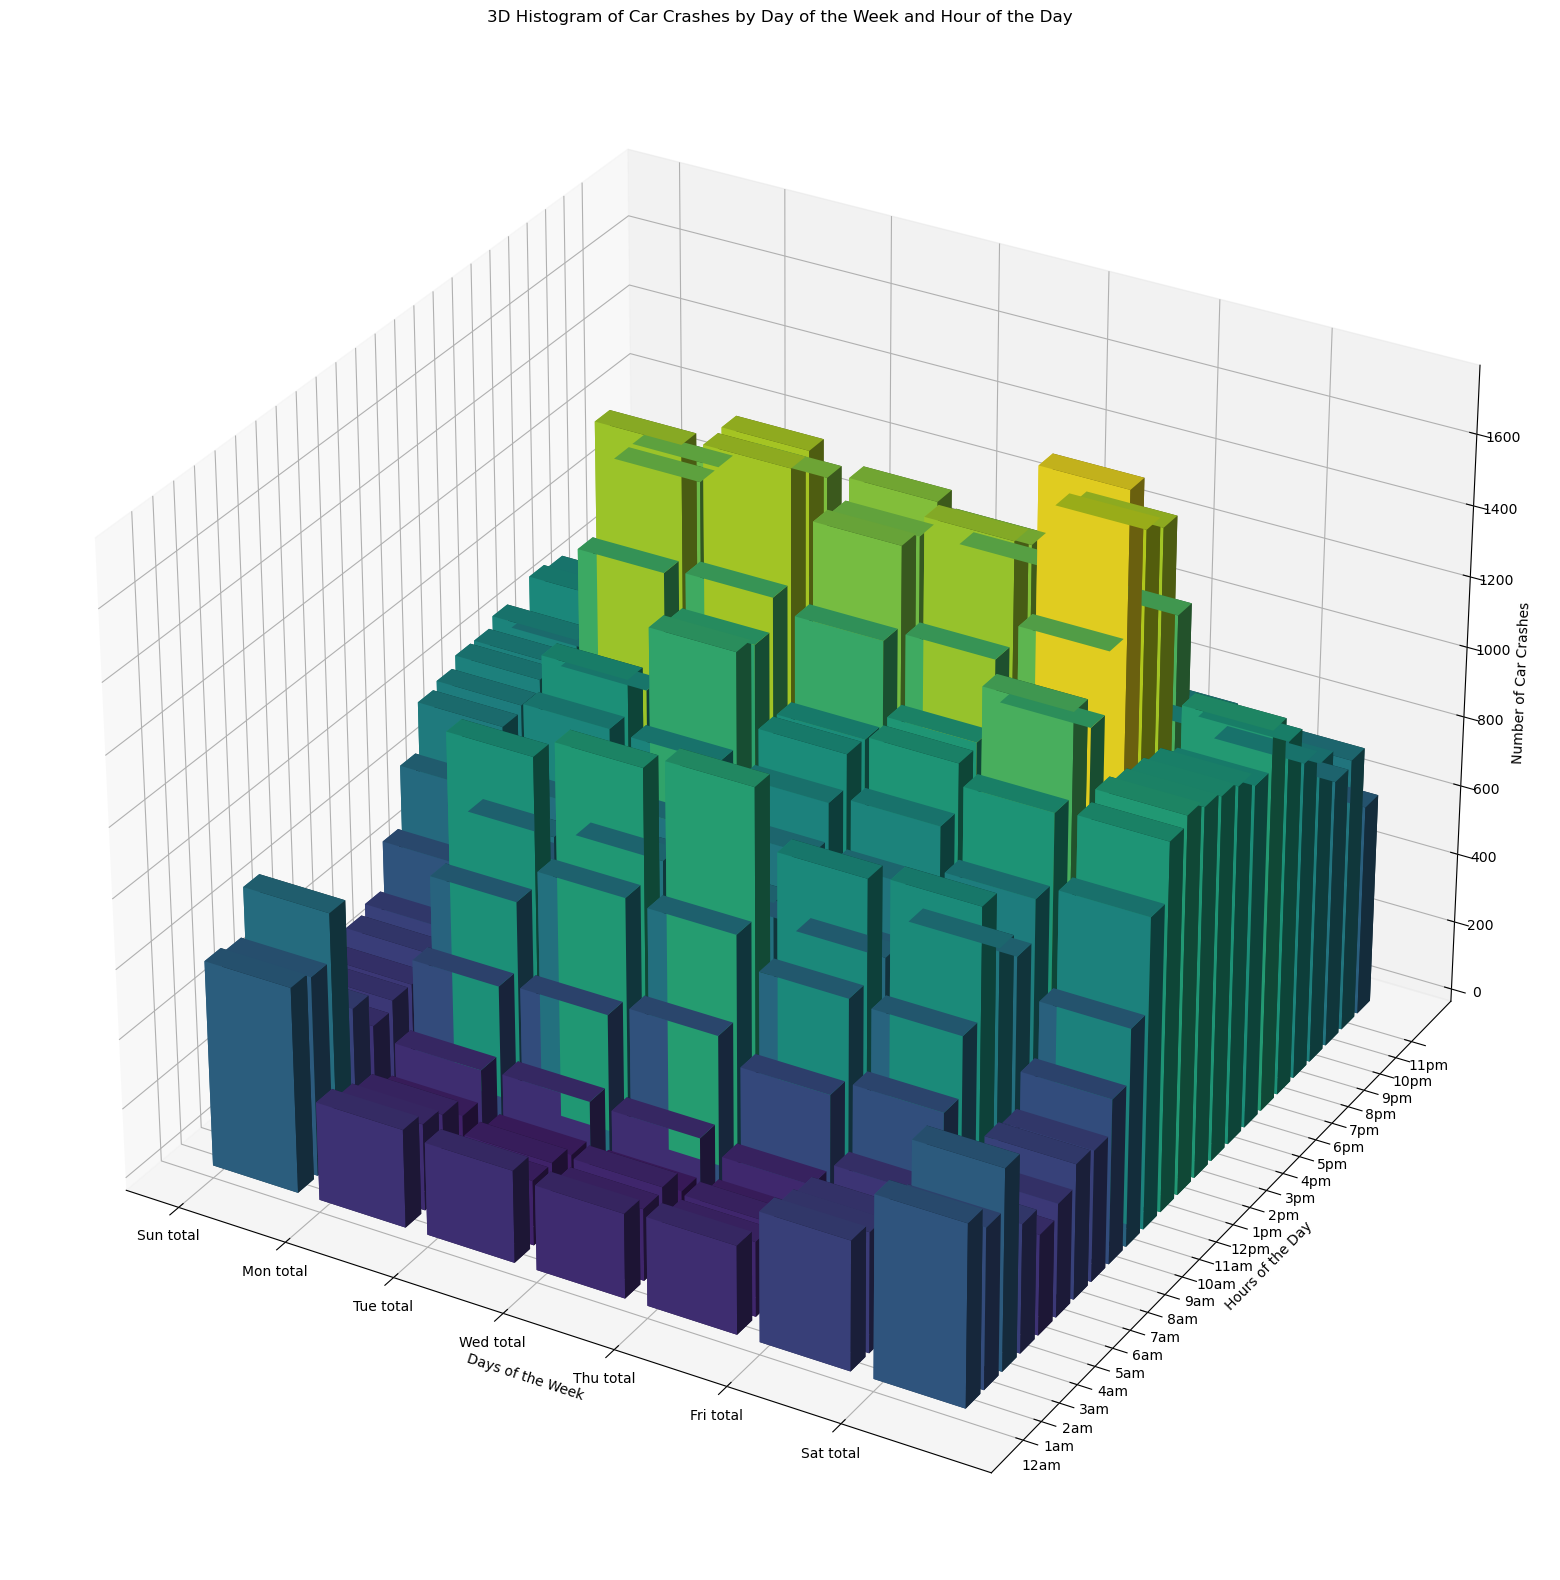

In [180]:

days_of_week = days_total.columns.values.tolist()
hours_of_day = days_total.index.values.tolist()
car_crashes = days_total.values.astype(float)

# Create a 3D histogram
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

# Create meshgrid for the X and Y axes
xpos, ypos = np.meshgrid(np.arange(len(days_of_week)), np.arange(len(hours_of_day)))

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

# Flatten the data array
dx = dy = 0.8
dz = car_crashes.flatten()

# Create a colormap
colors = plt.cm.viridis(dz / float(max(dz)))

# Plot 3D bars
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, shade=True, color=colors)

# Set labels and title
ax.set_xlabel('Days of the Week')
ax.set_ylabel('Hours of the Day')
ax.set_zlabel('Number of Car Crashes')
ax.set_xticks(np.arange(len(days_of_week)))
ax.set_xticklabels(days_of_week)
ax.set_yticks(np.arange(len(hours_of_day)))
ax.set_yticklabels(hours_of_day)

plt.title('3D Histogram of Car Crashes by Day of the Week and Hour of the Day')

# Show the plot
plt.show()




In [181]:
time_only = df.copy()
time_only.columns = time_only.columns.droplevel(0)

Crash Hour
12am    2526
1am     2231
2am     2461
3am     1630
4am     1890
5am     2982
6am     4154
7am     5841
8am     4581
9am     4482
10am    5490
11am    6548
12pm    7417
1pm     7251
2pm     8207
3pm     9762
4pm     9288
5pm     9301
6pm     7295
7pm     5599
8pm     5235
9pm     4654
10pm    3805
11pm    2682
Name: Total Crashes, dtype: int64


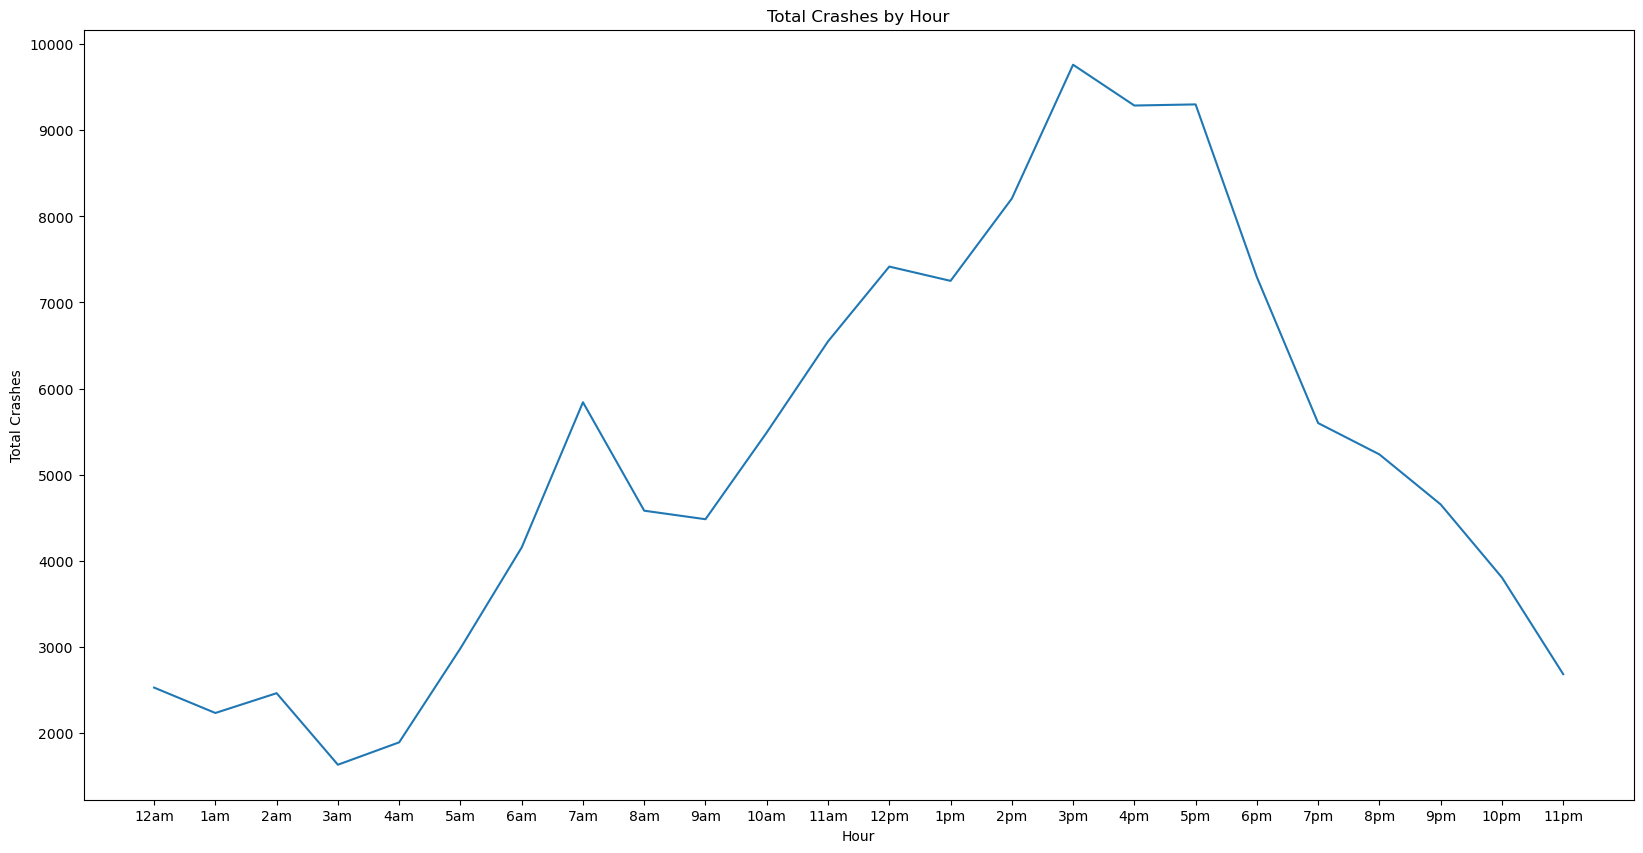

In [182]:
time_only['Total Crashes'] = time_only.astype(int).sum(axis=1)
time_total = time_only['Total Crashes']
print(time_total)

plt.figure(figsize=(20,10))
plt.title('Total Crashes by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Crashes')
plt.plot(time_total)
plt.show()

In [183]:
severity = df.copy()
severity.columns = severity.columns.droplevel(1)

severity['Total Fatal'] = severity['Fatal'].astype(int).sum(axis=1)
severity['Total Injury'] = severity['Injury'].astype(int).sum(axis=1)
severity['Total Property'] = severity['Property Damage'].astype(int).sum(axis=1)

severity_totals = severity.iloc[:,21:]
severity_totals

,Total Fatal,Total Injury,Total Property
Crash Hour,,,
12am,13,487,2026
1am,16,444,1771
2am,19,515,1927
3am,16,292,1322
4am,9,264,1617
5am,13,431,2538
6am,15,643,3496
7am,14,1179,4648
8am,11,985,3585


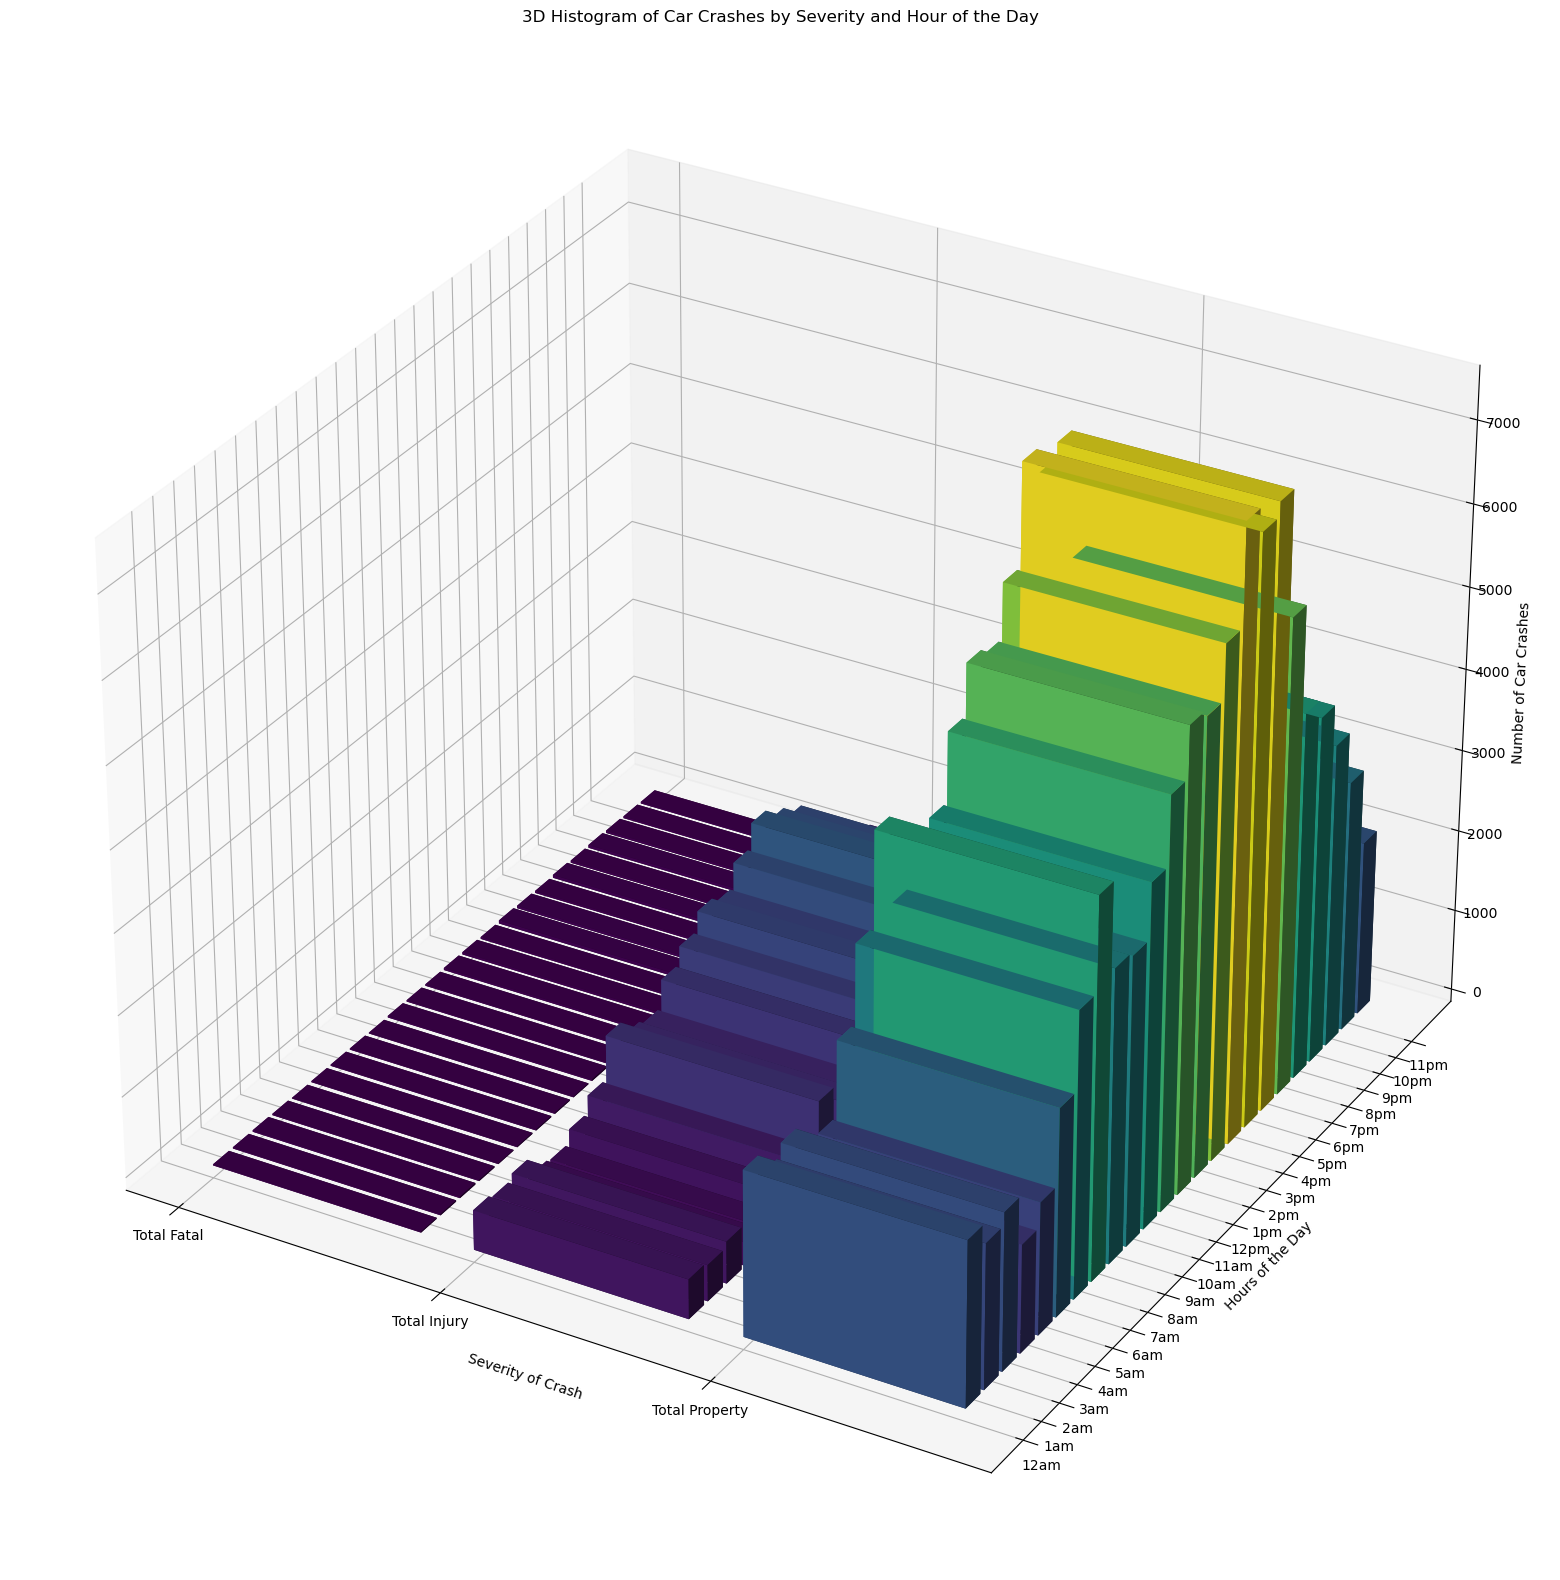

In [184]:

crash_severity = severity_totals.columns.values.tolist()
hours_of_day = severity_totals.index.values.tolist()
car_crashes = severity_totals.values.astype(float)

# Create a 3D histogram
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

# Create meshgrid for the X and Y axes
xpos, ypos = np.meshgrid(np.arange(len(crash_severity)), np.arange(len(hours_of_day)))

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

# Flatten the data array
dx = dy = 0.8
dz = car_crashes.flatten()

# Create a colormap
colors = plt.cm.viridis(dz / float(max(dz)))

# Plot 3D bars
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, shade=True, color=colors)

# Set labels and title
ax.set_xlabel('Severity of Crash')
ax.set_ylabel('Hours of the Day')
ax.set_zlabel('Number of Car Crashes')
ax.set_xticks(np.arange(len(crash_severity)))
ax.set_xticklabels(crash_severity)
ax.set_yticks(np.arange(len(hours_of_day)))
ax.set_yticklabels(hours_of_day)

plt.title('3D Histogram of Car Crashes by Severity and Hour of the Day')

# Show the plot
plt.show()

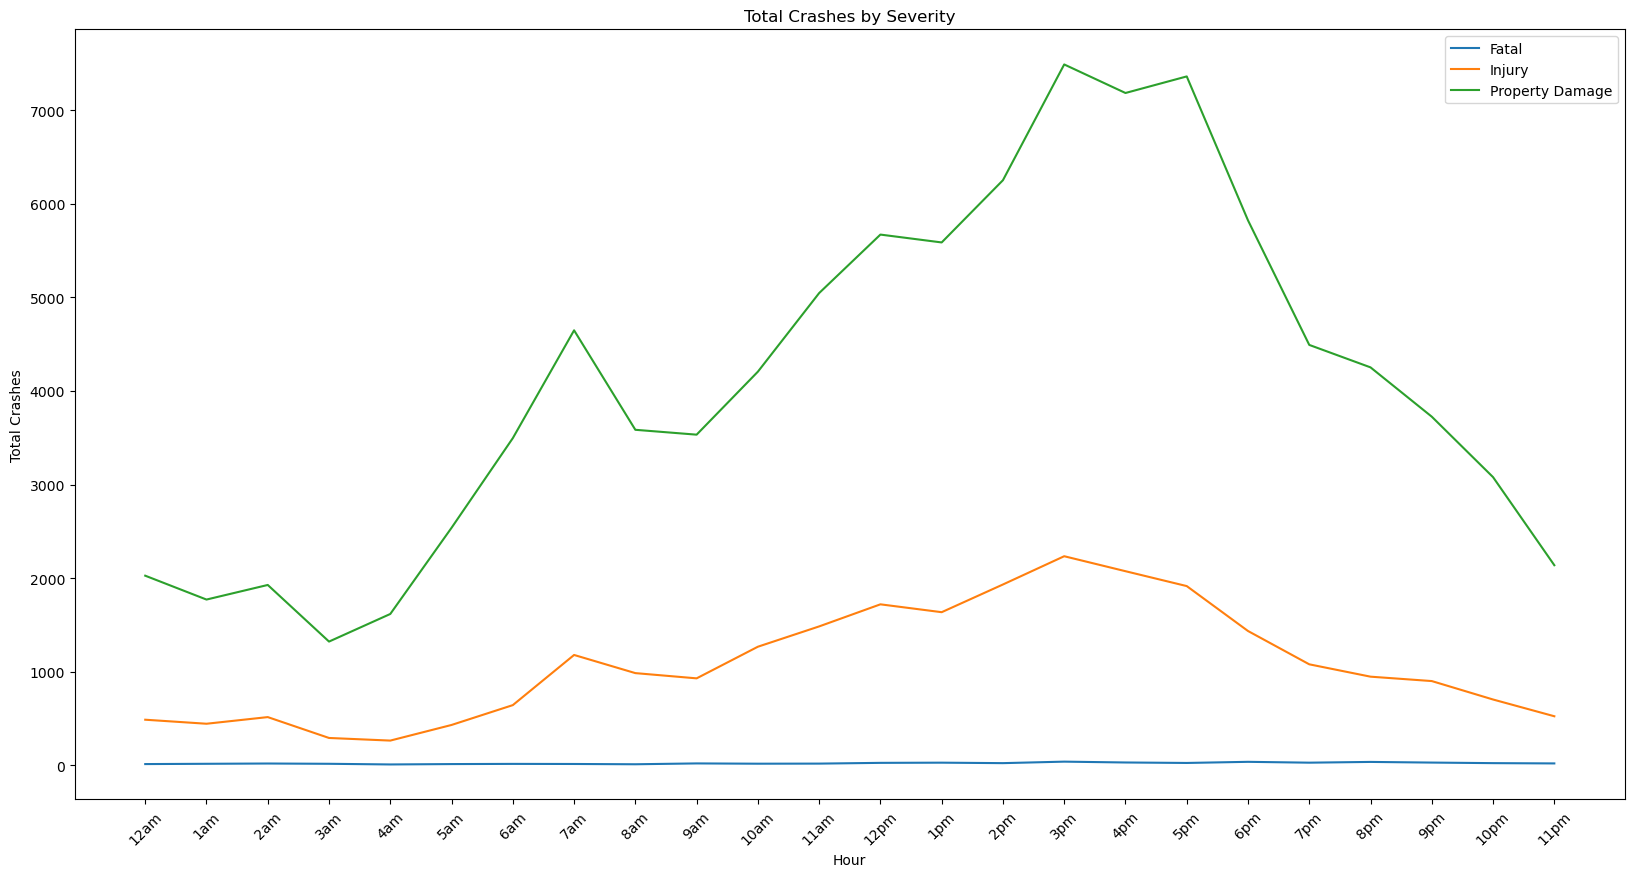

In [185]:
fatal_only = severity_totals.copy()
fatal_only = fatal_only['Total Fatal']

injury_only = severity_totals.copy()
injury_only = injury_only['Total Injury']

property_only = severity_totals.copy()
property_only = property_only['Total Property']

plt.figure(figsize=(20,10))
plt.plot(fatal_only, label='Fatal')
plt.plot(injury_only, label='Injury')
plt.plot(property_only, label='Property Damage')

plt.title('Total Crashes by Severity')
plt.xlabel('Hour')
plt.xticks(rotation=45)
plt.ylabel('Total Crashes')
plt.legend()
plt.show()

Somewhat predictably, the highest volume of crashes also lines up with severity rates. Crashes that are property damage only are the most frequently occuring, with fatal crashes being so low that you can't do any meaningful comparisons between the other two severity types.